In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datasets import load_dataset
import ast
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
ds = pd.read_pickle('datasets/ds_cleaned_2')

In [3]:
salary_distribution_data = ds[ds['salary_year_avg'].notna()]

In [4]:
salary_distribution_data.to_pickle('data_graphs/salary_distribution_jobs')

In [5]:

def jobs_list_sal(list_of_jobs_titles):
    
    jobs_list = []

    for  val  in list_of_jobs_titles:
        salary_distribution_data_2 = salary_distribution_data[salary_distribution_data['job_title_short'] == val]
        jobs_list.append(salary_distribution_data_2['salary_year_avg'].to_list())

    return jobs_list

In [6]:
jobs = ['Data Analyst' , 'Data Engineer' , 'Data Scientist']


In [7]:
jobs_list = jobs_list_sal(jobs)

{'whiskers': [<matplotlib.lines.Line2D at 0x12501d27190>,
 'caps': [<matplotlib.lines.Line2D at 0x12501d2cb90>,
 'boxes': [<matplotlib.lines.Line2D at 0x12501d26450>,
 'medians': [<matplotlib.lines.Line2D at 0x12501d2e450>,
 'fliers': [<matplotlib.lines.Line2D at 0x12501d2ef50>,
 'means': []}

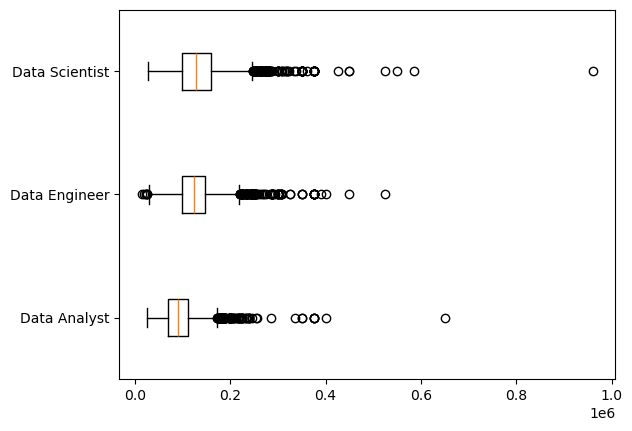

In [8]:
plt.boxplot(jobs_list , labels=jobs , vert= False)

In [20]:
salary_distribution_data_2 = salary_distribution_data[salary_distribution_data['job_title_short'].isin(['Data Scientist' , 'Data Engineer' , 'Data Analyst' , 'Senior Data Analyst' , 'Senior Data Engineer' , 'Senior Data Scientist'])]

In [33]:
median_order = salary_distribution_data_2.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending = False).index.to_list()

(0.0, 600000.0)

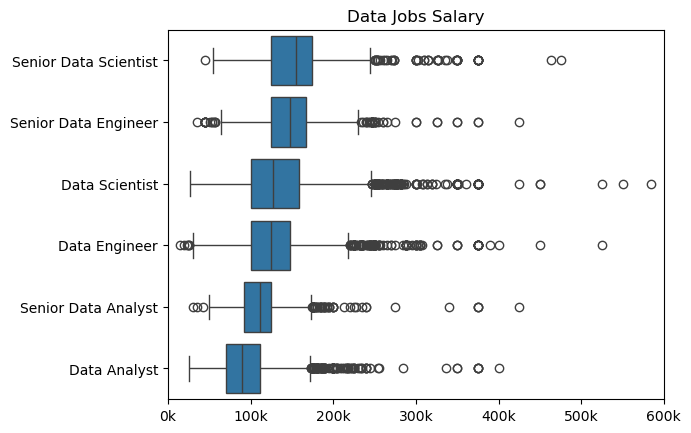

In [43]:
sns.boxplot(data=salary_distribution_data_2 , x='salary_year_avg' , y= 'job_title_short' , order= median_order)
plt.ylabel('')
plt.xlabel('')
plt.title('Data Jobs Salary')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x , pos:f'{int(x/1000)}k'))
plt.xlim(0,600000)